In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp
import Time_approximations as Ta
from functools import partial
from scipy.integrate import quad

from singlelocusmodelextended import SingleLocusModelExt
modelext = SingleLocusModelExt(k=1)

In [11]:
all_sims=np.load('all_sims.npy',allow_pickle=True)
post_sam=np.load('post_sam.npy', allow_pickle=True)

In [4]:
np.shape(all_sims)

(100000, 3)

In [5]:
all_aneu_means=np.array([np.mean(all_sims[x,2][0][0]) for x in range(len(all_sims))])

In [6]:
all_means=np.mean(all_aneu_means)
all_std=np.std(all_aneu_means)
perc=np.percentile(all_aneu_means,(2.5,97.5))
all_means, perc

(0.16729464236904282, array([0.01540451, 0.36984928]))

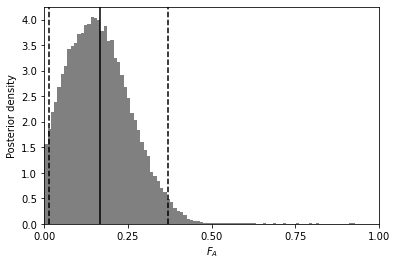

In [8]:
plt.hist(all_aneu_means, 100, density=True,color='grey')
plt.xlabel('$F_A$')
plt.ylabel('Posterior density')
plt.axvline(x=all_means,color='k')
plt.axvline(x=perc[0],color='k',ls='--')
plt.axvline(x=perc[1],color='k',ls='--')
plt.xlim([0,1])
plt.xticks([0, 0.25, 0.5, 0.75, 1]);
plt.savefig('latest post samp analysis/histo_100000.pdf');

In [9]:
aneu_dom = all_aneu_means>.5

In [10]:
sum(aneu_dom), sum(aneu_dom)/len(all_aneu_means), len(all_aneu_means)

(489, 0.00489, 100000)

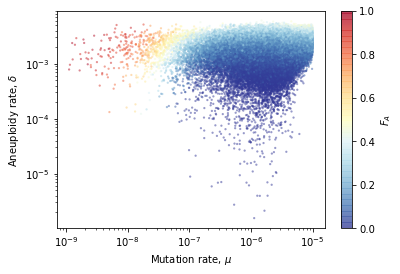

In [12]:
plt.scatter(post_sam[:,1],post_sam[:,2], c=all_aneu_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.5, s=5)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')
plt.savefig('latest post samp analysis/scatter100000_log.pdf');

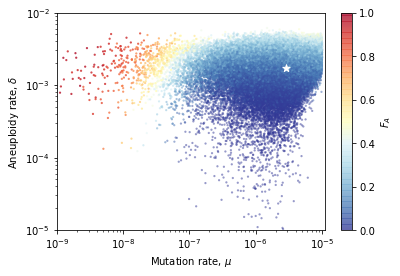

In [14]:
plt.scatter(post_sam[~aneu_dom,1],post_sam[~aneu_dom,2], c=all_aneu_means[~aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.5, s=5)
plt.colorbar(label='$F_A$')
plt.scatter(post_sam[aneu_dom,1],post_sam[aneu_dom,2], c=all_aneu_means[aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.8, s=5)
plt.scatter(2.9e-6,1.7e-3,marker='*',c='w',s=60)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')
plt.xlim([1e-9,1.1e-5])
plt.ylim([1e-5,1e-2])
plt.savefig('latest post samp analysis/scatter100000_log_star.pdf');

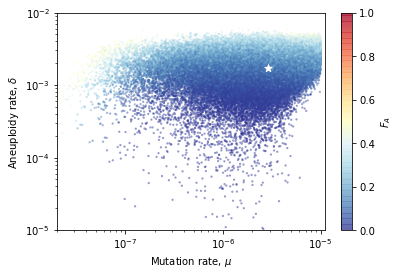

In [17]:
plt.scatter(post_sam[~aneu_dom,1],post_sam[~aneu_dom,2], c=all_aneu_means[~aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.5, s=5)
plt.colorbar(label='$F_A$')
#plt.scatter(post_sam[aneu_dom,1],post_sam[aneu_dom,2], c=all_aneu_means[aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.8, s=5)
plt.scatter(2.9e-6,1.7e-3,marker='*',c='w',s=60)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')
plt.xlim([2e-8,1.1e-5])
plt.ylim([1e-5,1e-2])
plt.savefig('latest post samp analysis/scatter_dirmut_log_star_byr.pdf');

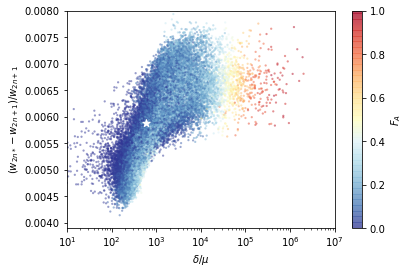

In [18]:
plt.scatter(post_sam[:,2]/post_sam[:,1],post_sam[:,5]/post_sam[:,3]-1, c=all_aneu_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.5, s=5)
plt.colorbar(label='$F_A$')
plt.scatter(1.7e-3/2.9e-6,1.028/1.022-1,marker='*',c='w',s=60)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$(w_{2n*}-w_{2n+1})/w_{2n+1}$')
plt.xlim([10,1e7])
plt.ylim([.0039,.008])
plt.savefig('latest post samp analysis/scatter100000_rater_fitr_from_wt.pdf');

(0.0039, 0.008)

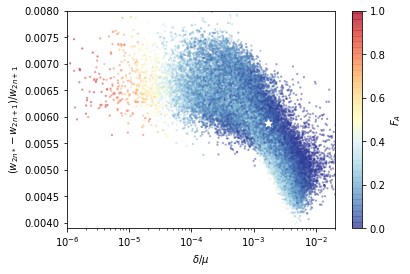

In [657]:
plt.scatter((post_sam[:,2]/post_sam[:,1]+1)**(-1),post_sam[:,5]/post_sam[:,3]-1, c=all_aneu_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.5, s=5)
plt.colorbar(label='$F_A$')
plt.scatter((1.7e-3/2.9e-6+1)**(-1),1.028/1.022-1,marker='*',c='w',s=60)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$(w_{2n*}-w_{2n+1})/w_{2n+1}$')
plt.xlim([1e-6,.02])
plt.ylim([.0039,.008])
#plt.savefig('latest post samp analysis/scatter100000_rater_fitr_from_wt.pdf');

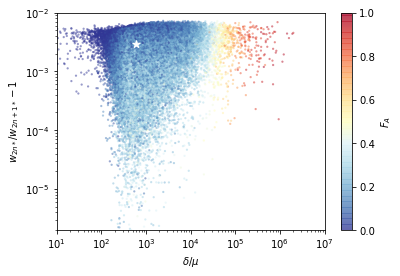

In [19]:
plt.scatter(post_sam[:,2]/post_sam[:,1],post_sam[:,5]/post_sam[:,4]-1, c=all_aneu_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.5, s=5)
plt.colorbar(label='$F_A$')
plt.scatter(1.7e-3/2.9e-6,1.028/1.025-1,marker='*',c='w',s=60)
#plt.axhline(0,color='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1*}-1$')
plt.xlim([10,1e7])
plt.ylim([2e-6,1e-2])
plt.savefig('latest post samp analysis/scatter100000_rater_fitr_mut.pdf');

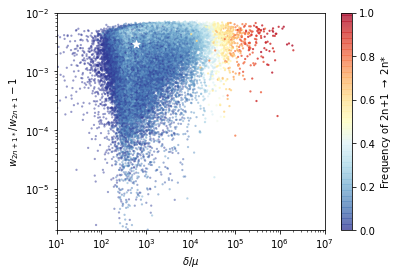

In [20]:
plt.scatter(post_sam[~aneu_dom][:,2]/post_sam[~aneu_dom][:,1],post_sam[~aneu_dom][:,4]/post_sam[~aneu_dom][:,3]-1, c=all_aneu_means[~aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.5, s=5)
plt.colorbar(label=r'Frequency of 2n+1 $\rightarrow$ 2n*')
plt.scatter(post_sam[aneu_dom][:,2]/post_sam[aneu_dom][:,1],post_sam[aneu_dom][:,4]/post_sam[aneu_dom][:,3]-1, c=all_aneu_means[aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.8, s=5)
plt.scatter(1.7e-3/2.9e-6,1.025/1.022-1,marker='*',c='w',s=60)
#plt.axvline(364.61775520198046,color='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$w_{2n+1*}/w_{2n+1}-1$')
plt.xlim([10,1e7])
plt.ylim([2e-6,1e-2])
plt.savefig('latest post samp analysis/scatter100000_rater_fitr_mut.pdf');

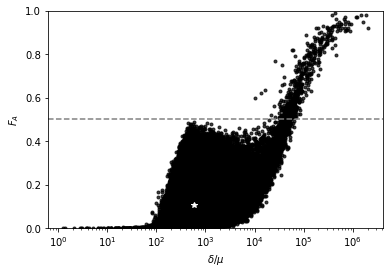

In [22]:
plt.plot(post_sam[:,2]/(post_sam[:,1]),all_aneu_means, ls='', marker='.', color='k' , alpha=.75)

plt.plot(1.7e-3/2.9e-6,0.10630672684824902,marker='*',c='w')
plt.axhline(.5,ls='--',color='gray')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$F_A$')
#plt.xlim([-.000001,.0001])
plt.ylim([0,1])
plt.savefig('latest post samp analysis/plot_rateratios_means_yoavsugg.pdf');

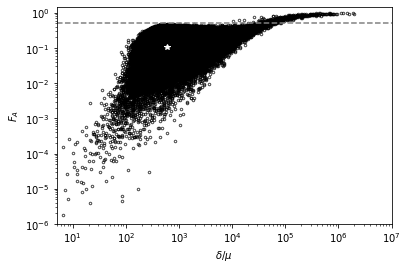

In [23]:
plt.plot(post_sam[:,2]/post_sam[:,1],all_aneu_means,'.',c='k',ms=5, markerfacecolor='none',alpha=.7)

plt.plot(1.7e-3/2.9e-6,0.10630672684824902,marker='*',c='w')
plt.axhline(.5,ls='--',color='gray')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$F_A$')
plt.xlim([5,1e7])
plt.ylim([1e-6,1.5])
plt.savefig('latest post samp analysis/plot_rateratios_means_log.pdf');

In [25]:
p2n2n1=1-(1-2*(post_sam[:,3]-1)*post_sam[:,2])**6.425e6
p2n2nstar=1-(1-2*(post_sam[:,5]-1)*post_sam[:,1])**6.425e6
pMAPmu=1-(1-2*(1.028-1)*2.942e-6)**6.425e6
pMAPdelta=1-(1-2*(1.022-1)*1.722e-3)**6.425e6

In [26]:
p2n2n1,len(p2n2n1),p2n2n1.min(),p2n2n1.argmin()

(array([1., 1., 1., ..., 1., 1., 1.]), 100000, 0.34880545913696515, 57436)

In [27]:
p2n2nstar,len(p2n2nstar),p2n2nstar.min(),p2n2nstar.argmin(),p2n2nstar.max()

(array([0.8664593 , 0.88731523, 0.46767885, ..., 0.81654077, 0.67916199,
        0.88037138]),
 100000,
 0.00043169262324227464,
 69801,
 0.9803481180496512)

In [28]:
pa=p2n2n1/(p2n2n1+p2n2nstar)
pa_MAP=pMAPdelta/(pMAPdelta+pMAPmu)

In [29]:
pa.min(),pa.max(),pa.argmin(),post_sam[30145],pa_MAP

(0.5049617240956865,
 0.9995684936548639,
 74608,
 array([3.01450000e+04, 3.71311259e-06, 3.53577930e-03, 1.02219378e+00,
        1.02566106e+00, 1.02800906e+00]),
 0.6049478281381259)

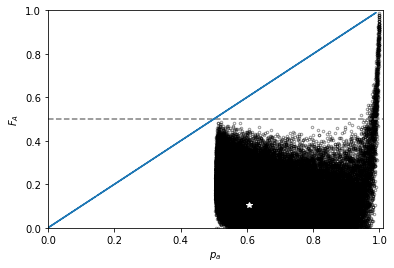

In [30]:
plt.plot(pa,all_aneu_means,'.',c='k',ms=5, markerfacecolor='none',alpha=.4)

plt.axhline(.5,ls='--',color='gray')
plt.plot(pa_MAP,0.10630672684824902,marker='*',c='w')
plt.plot(all_aneu_means,all_aneu_means)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$p_a$')
plt.ylabel('$F_A$')
plt.xlim([0,1.01])
plt.ylim([0,1])
plt.savefig('latest post samp analysis/scatter_pa_Fa.pdf');